# Méthodes utiles

Examinons quelques méthodes et fonctions utiles intégrées à Pandas. Il s'agit en fait d'un petit échantillon des fonctions et des méthodes disponibles dans la bibliothèque Pandas, mais elles sont parmi les plus couramment utilisées.

La [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) est une excellente ressource pour continuer à explorer davantage de méthodes et de fonctions (nous en présenterons plus loin dans le cours).

Voici une liste des fonctions et des méthodes que nous aborderons ici (Voir le sommaire pour vous rendre sur chaque fonction/méthode sur Google Colab ou en cliquant sur les liens dans la liste ci-dessous sur Jupyter Notebook) :

* [méthode apply()](#apply_method)
* [apply() avec une fonction](#apply_function)
* [apply() avec une expression lambda](#apply_lambda)
* [apply() sur des colonnes multiples](#apply_multiple)
* [describe()](#describe)
* [sort_values()](#sort)
* [corr()](#corr)
* [idxmin et idxmax](#idx)
* [value_counts](#v_c)
* [replace](#replace)
* [unique et nunique](#uni)
* [map](#map)
* [duplicated et drop_duplicates](#dup)
* [between](#bet)
* [sample](#sample)
* [nlargest et nsmallest](#n)


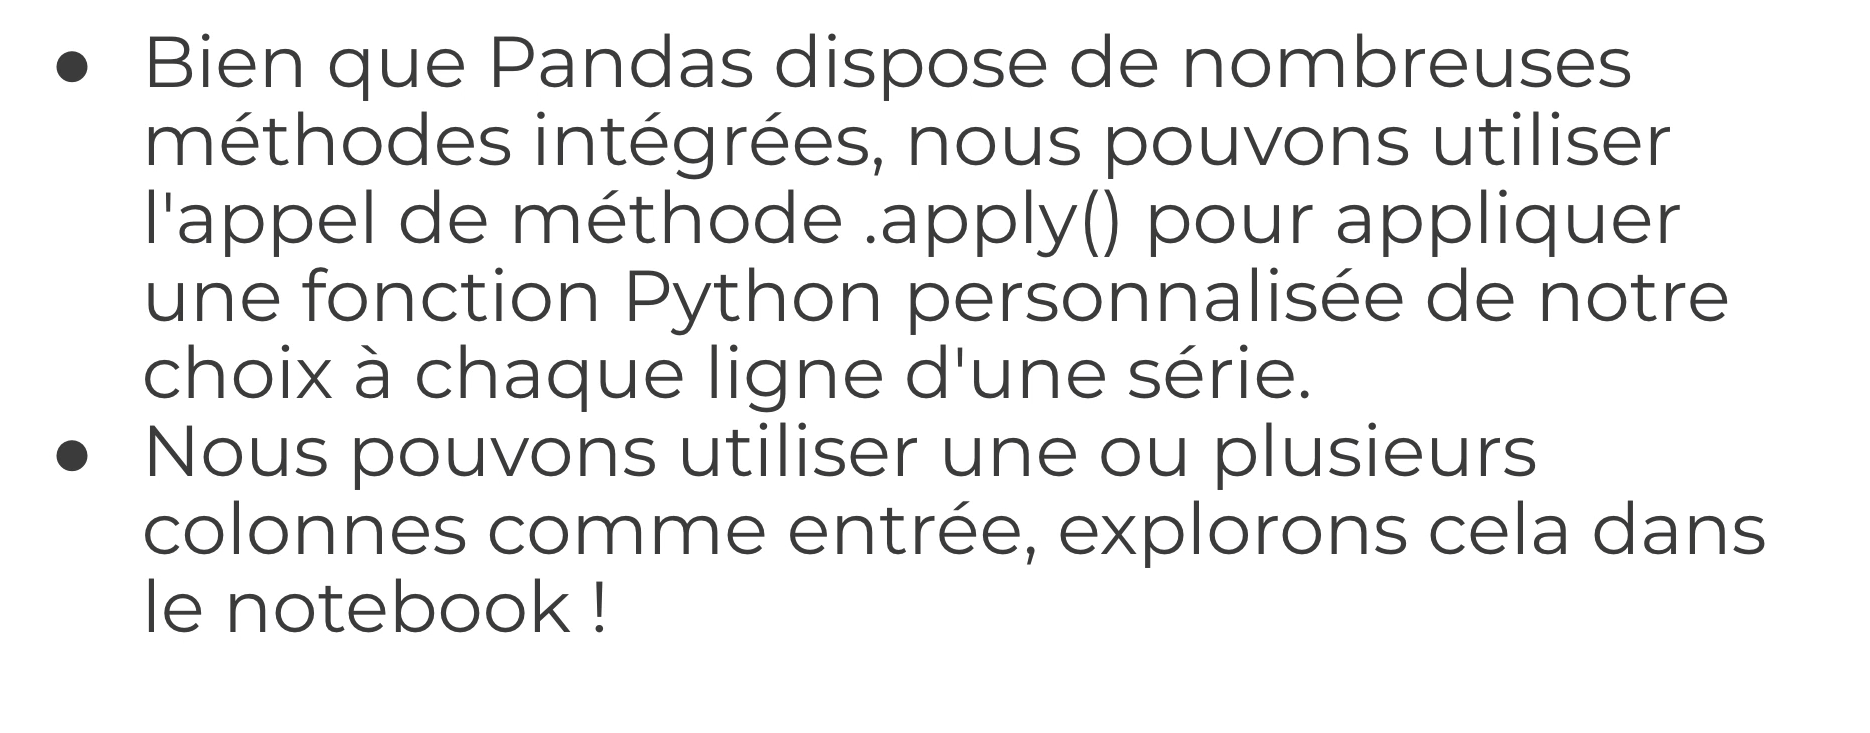

<a id='apply_method'></a>
## méthode .apply()

Nous allons découvrir ici une méthode très utile qui s'applique sur un DataFrame : **apply**. Cela nous permet d'appliquer et de diffuser des fonctions personnalisées sur une colonne de DataFrame.

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r'G:\Data Analyst\Python\Udemy\Data Science et Machine Learning\Pandas\Data\tips2.csv')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


<a id='apply_function'></a>
## apply avec une fonction

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [8]:
#retourner les dernieres 4 chiffres de la carte de credit
def last_four(num):
    return str(num)[-4:]

In [11]:
df['CC Number'][0]

3560325168603410

In [12]:
last_four(3560325168603410)

'3410'

In [13]:
df['last_four'] = df['CC Number'].apply(last_four)

In [14]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221


In [19]:
#On desire noter les restaurants selon leur prix
df['total_bill'].mean()

19.78594262295082

In [16]:
def yelp(price):
    if price < 10:
        return '$'
    elif price >= 10 and price < 30:
        return '$$'
    else:
        return '$$$'

In [17]:
df['Expensive'] = df['total_bill'].apply(yelp)

In [18]:
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657,2842,$$
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766,5404,$$
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880,7196,$$
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17,0950,$$


<a id='apply_lambda'></a>
## apply avec une expression lambda

In [20]:
def simple(num):
    return num*2

In [21]:
lambda num: num*2

<function __main__.<lambda>(num)>

In [22]:
df['total_bill'].apply(lambda bill:bill*0.18)

0      3.0582
1      1.8612
2      3.7818
3      4.2624
4      4.4262
        ...  
239    5.2254
240    4.8924
241    4.0806
242    3.2076
243    3.3804
Name: total_bill, Length: 244, dtype: float64

<a id='apply_multiple'></a>
## apply avec des colonnes multiples

Notez qu'il existe plusieurs façons de procéder :

https://stackoverflow.com/questions/19914937/applying-function-with-multiple-arguments-to-create-a-new-pandas-column

In [23]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$


In [24]:
def quality(total_bill,tip):
    if tip/total_bill  > 0.25:
        return "Generous"
    else:
        return "Other"

In [25]:
df['Tip Quality'] = df[['total_bill','tip']].apply(lambda df: quality(df['total_bill'],df['tip']),axis=1)

In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


In [27]:
import numpy as np

In [28]:
df['Tip Quality'] = np.vectorize(quality)(df['total_bill'], df['tip'])

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


<a id='describe'></a>
## df.describe pour des résumés statistiques

In [32]:
df.describe()

,total_bill,tip,size,price_per_person,CC Number
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,19.785943,2.998279,2.569672,7.888197,2.563496e+15
std,8.902412,1.383638,0.951100,2.914234,2.369340e+15
min,3.070000,1.000000,1.000000,2.880000,6.040679e+10
25%,13.347500,2.000000,2.000000,5.800000,3.040731e+13
50%,17.795000,2.900000,2.000000,7.255000,3.525318e+15
75%,24.127500,3.562500,3.000000,9.390000,4.553675e+15
max,50.810000,10.000000,6.000000,20.270000,6.596454e+15


In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,1.978594e+01,8.902412e+00,3.070000e+00,1.334750e+01,1.779500e+01,2.412750e+01,5.081000e+01
tip,244.0,2.998279e+00,1.383638e+00,1.000000e+00,2.000000e+00,2.900000e+00,3.562500e+00,1.000000e+01
size,244.0,2.569672e+00,9.510998e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
price_per_person,244.0,7.888197e+00,2.914234e+00,2.880000e+00,5.800000e+00,7.255000e+00,9.390000e+00,2.027000e+01
CC Number,244.0,2.563496e+15,2.369340e+15,6.040679e+10,3.040731e+13,3.525318e+15,4.553675e+15,6.596454e+15


<a id='sort'></a>
## sort_values()

In [35]:
df.sort_values('tip', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954,8236,$$$,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Other
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Other
111,7.25,1.00,Female,No,Sat,Dinner,1,7.25,Terri Jones,3559221007826887,Sat4801,6887,$,Other
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,$,Generous


In [69]:
# Utile si vous voulez réordonner après un tri
# https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
df.sort_values(['tip','size'], ascending=False)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954,8236,$$$,Ok
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Ok
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Ok
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Ok
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Ok
92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780,6392,$,Ok
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Ok
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,$,Generous


<a id='corr'></a>
## df.corr() pour des vérifications de corrélation

[Wikipedia sur la corrélation](https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques))

In [38]:
df.corr()

C:\Users\Ilyas\AppData\Local\Temp\ipykernel_11692\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size,price_per_person,CC Number
total_bill,1.000000,0.675734,0.598315,0.647554,0.104576
tip,0.675734,1.000000,0.489299,0.347405,0.110857
size,0.598315,0.489299,1.000000,-0.175359,-0.030239
price_per_person,0.647554,0.347405,-0.175359,1.000000,0.135240
CC Number,0.104576,0.110857,-0.030239,0.135240,1.000000


In [39]:
df[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


<a id='idx'></a>
## idxmin et idxmax

In [40]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


In [41]:
df['total_bill'].max()

50.81

In [42]:
df['total_bill'].idxmax()

170

In [43]:
df['total_bill'].idxmin()

67

In [44]:
df.iloc[67]

total_bill                      3.07
tip                              1.0
sex                           Female
smoker                           Yes
day                              Sat
time                          Dinner
size                               1
price_per_person                3.07
Payer Name             Tiffany Brock
CC Number           4359488526995267
Payment ID                   Sat3455
last_four                       5267
Expensive                          $
Tip Quality                 Generous
Name: 67, dtype: object

In [45]:
df.iloc[170]

total_bill                     50.81
tip                             10.0
sex                             Male
smoker                           Yes
day                              Sat
time                          Dinner
size                               3
price_per_person               16.94
Payer Name             Gregory Clark
CC Number           5473850968388236
Payment ID                   Sat1954
last_four                       8236
Expensive                        $$$
Tip Quality                    Other
Name: 170, dtype: object

<a id='v_c'></a>
## value_counts

Méthode sympa pour obtenir rapidement un compte par catégorie. N'a de sens que sur les colonnes catégorielles.

In [46]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


In [47]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<a id='replace'></a>

## replace

Remplace rapidement les valeurs par d'autres.

In [48]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


In [49]:
df['Tip Quality'].replace(to_replace='Other',value='Ok')

0      Ok
1      Ok
2      Ok
3      Ok
4      Ok
       ..
239    Ok
240    Ok
241    Ok
242    Ok
243    Ok
Name: Tip Quality, Length: 244, dtype: object

In [50]:
df['Tip Quality'] = df['Tip Quality'].replace(to_replace='Other',value='Ok')

In [51]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Ok
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Ok
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Ok
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Ok
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Ok


<a id='uni'></a>
## unique

In [52]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [53]:
df['size'].nunique()

6

In [54]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

<a id='map'></a>
## map

In [55]:
my_map = {'Dinner':'D','Lunch':'L'}

In [56]:
df['time'].map(my_map)

0      D
1      D
2      D
3      D
4      D
      ..
239    D
240    D
241    D
242    D
243    D
Name: time, Length: 244, dtype: object

In [57]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Ok
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Ok
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Ok
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Ok
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Ok


<a id='dup'></a>

## duplicated() et drop_duplicates()

### .duplicated()

In [58]:
# Renvoie True pour la première instance d'une ligne dupliquée
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [59]:
simple_df = pd.DataFrame([1,2,2],['a','b','c'])

In [60]:
simple_df

,0
a,1
b,2
c,2


In [61]:
simple_df.duplicated()

a    False
b    False
c     True
dtype: bool

### .drop_duplicates()

In [62]:
simple_df.drop_duplicates()

,0
a,1
b,2


<a id='bet'></a>
## between

*   **left** : Une valeur scalaire qui définit la limite de gauche
*   **right** : Une valeur scalaire qui définit la limite de droite
*   **inclusive** : Une valeur booléenne qui est True par défaut. Si elle est False, elle exclut les deux arguments passés lors de la vérification.



In [63]:
df['total_bill'].between(10,20,inclusive=True)

C:\Users\Ilyas\AppData\Local\Temp\ipykernel_11692\4013148072.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df['total_bill'].between(10,20,inclusive=True)


0       True
1       True
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242     True
243     True
Name: total_bill, Length: 244, dtype: bool

In [64]:
df[df['total_bill'].between(10,20,inclusive=True)]

C:\Users\Ilyas\AppData\Local\Temp\ipykernel_11692\1152120679.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df[df['total_bill'].between(10,20,inclusive=True)]


,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Ok
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Ok
8,15.04,1.96,Male,No,Sun,Dinner,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820,0377,$$,Ok
9,14.78,3.23,Male,No,Sun,Dinner,2,7.39,Jerome Abbott,3532124519049786,Sun3775,9786,$$,Ok
10,10.27,1.71,Male,No,Sun,Dinner,2,5.14,William Riley,566287581219,Sun2546,1219,$$,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2,7.76,Tracy Douglas,4097938155941930,Sat7220,1930,$$,Ok
235,10.07,1.25,Male,No,Sat,Dinner,2,5.04,Sean Gonzalez,3534021246117605,Sat4615,7605,$$,Ok
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Ok
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17,0950,$$,Ok


<a id='sample'></a>
## sample

In [65]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
143,27.05,5.00,Female,No,Thur,Lunch,6,4.51,Regina Jones,4311048695487,Thur6179,5487,$$,Ok
125,29.80,4.20,Female,No,Thur,Lunch,6,4.97,Angela Sanchez,503857080488,Thur3948,0488,$$,Ok
40,16.04,2.24,Male,No,Sat,Dinner,3,5.35,Adam Edwards,3544447755679420,Sat8549,9420,$$,Ok
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27,Stephen Cox,3547798222044029,Sun5140,4029,$$$,Ok
191,19.81,4.19,Female,Yes,Thur,Lunch,2,9.90,Kristy Boyd,4317015327600068,Thur967,0068,$$,Ok


In [66]:
df.sample(frac=0.1)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
97,12.03,1.50,Male,Yes,Fri,Dinner,2,6.02,Eric Herrera,580116092652,Fri9268,2652,$$,Ok
62,11.02,1.98,Male,Yes,Sat,Dinner,2,5.51,Joseph Hart,180046232326178,Sat2265,6178,$$,Ok
148,9.78,1.73,Male,No,Thur,Lunch,2,4.89,David Stewart,3578014604116399,Thur7276,6399,$,Ok
102,44.30,2.50,Female,Yes,Sat,Dinner,3,14.77,Heather Cohen,379771118886604,Sat6240,6604,$$$,Ok
45,18.29,3.00,Male,No,Sun,Dinner,2,9.14,Richard Fitzgerald,375156610762053,Sun8643,2053,$$,Ok
234,15.53,3.00,Male,Yes,Sat,Dinner,2,7.76,Tracy Douglas,4097938155941930,Sat7220,1930,$$,Ok
20,17.92,4.08,Male,No,Sat,Dinner,2,8.96,Thomas Rice,4403296224639756,Sat1709,9756,$$,Ok
150,14.07,2.50,Male,No,Sun,Dinner,2,7.04,Luke Rice,4813617017359506,Sun8863,9506,$$,Ok
96,27.28,4.00,Male,Yes,Fri,Dinner,2,13.64,Eric Carter,4563054452787961,Fri3159,7961,$$,Ok
119,24.08,2.92,Female,No,Thur,Lunch,4,6.02,Melanie Jordan,676212062720,Thur8063,2720,$$,Ok


<a id='n'></a>
## nlargest et nsmallest

In [67]:
df.nlargest(10,'tip')

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954,8236,$$$,Ok
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Ok
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Ok
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Ok
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Ok
183,23.17,6.50,Male,Yes,Sun,Dinner,4,5.79,Dr. Michael James,4718501859162,Sun6059,9162,$$,Generous
214,28.17,6.50,Female,Yes,Sat,Dinner,3,9.39,Marissa Jackson,4922302538691962,Sat3374,1962,$$,Ok
47,32.40,6.00,Male,No,Sun,Dinner,4,8.10,James Barnes,3552002592874186,Sun9677,4186,$$$,Ok
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657,2842,$$,Ok
88,24.71,5.85,Male,No,Thur,Lunch,2,12.36,Roger Taylor,4410248629955,Thur9003,9955,$$,Ok
